## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.15: near-infrared and millimeter high resolution images of the IM Lup protoplanetary disk

#### near-infrared image is a jpg from the ESO press release (https://www.eso.org/public/images/eso1811c/)
#### millimeter data is a fits file from the ALMA project archive (https://bulk.cv.nrao.edu/almadata/lp/DSHARP/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.io import fits
from astropy.visualization import (ImageNormalize, MinMaxInterval, SqrtStretch, LogStretch, SinhStretch, AsinhStretch)
%matplotlib inline

/anaconda/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/anaconda/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


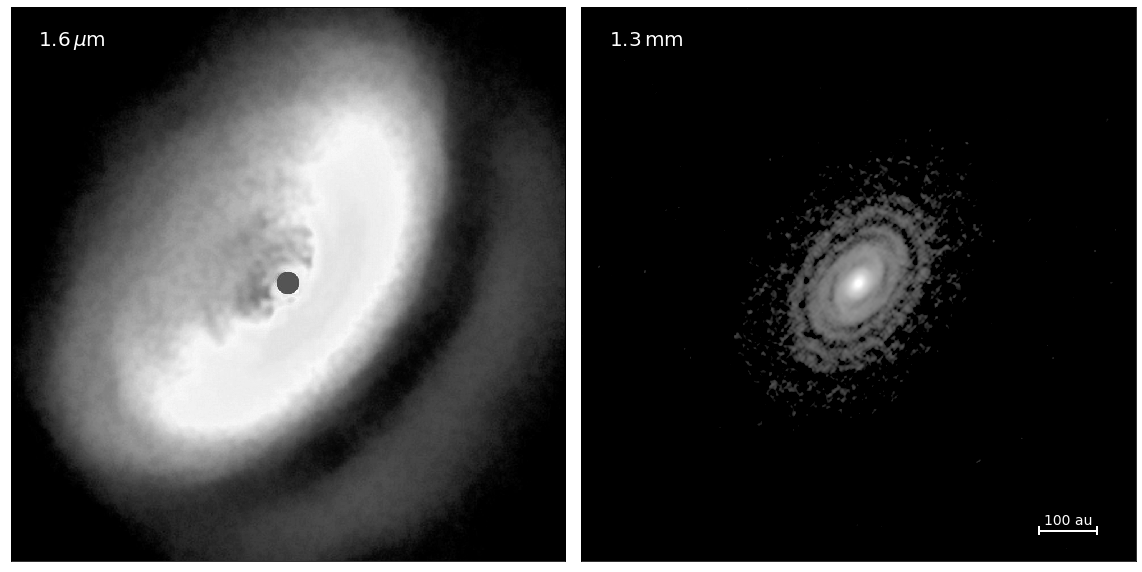

In [3]:
img = mpimg.imread('IMLup_SPHERE.jpg')
#print(img.shape)
# this is 1464 x 1464 pixels = 9'' x 9''
# crop to 7''
i1, i2 = 163, 1301
j1, j2 = 163, 1301
# crop to 6'' = 976 pix
i1, i2 = 244, 1220
j1, j2 = 244, 1220
im1 = img[i1:i2, j1:j2, 0]

hdu = fits.open('IMLup_ALMA.fits')
#hd2 = hdu[0].header
# image is 4000 x 4000 pix with pixel scale of 0.003 arcsec
imin, imax = 1000, 3000
jmin, jmax = 1000, 3000
im2 = hdu[0].data.squeeze()[imin:imax, jmin:jmax] * 1000

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
norm = ImageNormalize(im1, MinMaxInterval(), stretch=SinhStretch(0.9))
ax1.imshow(im1, cmap='gist_gray', norm=norm)
ax1.text(0.05,0.93,r'$1.6\,\mu{\rm m}$', {'color': 'w', 'fontsize': 20}, transform=ax1.transAxes)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
norm = ImageNormalize(im2, vmin=0.05, vmax=5.0, stretch=LogStretch())
ax2.imshow(im2, cmap='gist_gray', origin='lower', norm=norm)
ax2.text(0.05,0.93,r'$1.3\,{\rm mm}$', {'color': 'w', 'fontsize': 20}, transform=ax2.transAxes)

# scale bar
#dy = hd2['CDELT2'] * 3600
# 0.003 arcsec per pixel(!)
# distance = 158 +/- 3 pc
# => 30au = 63.3 pixels
# => 100au = 211 pixels
xbar = 211
x0 = 1650
x1 = x0 + xbar
y0 = 110
dy = 12
ax2.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax2.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax2.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax2.text(0.5*(x0+x1), y0+1.7*dy, '100 au', color='white', fontsize=14, ha='center')

plt.tight_layout()
plt.savefig('IMLup.pdf')